In [4]:
# Import Packages and Libraris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the Pima Indians Diabetes dataset (replace with your data)
data = pd.read_csv("/content/diabetes.csv")


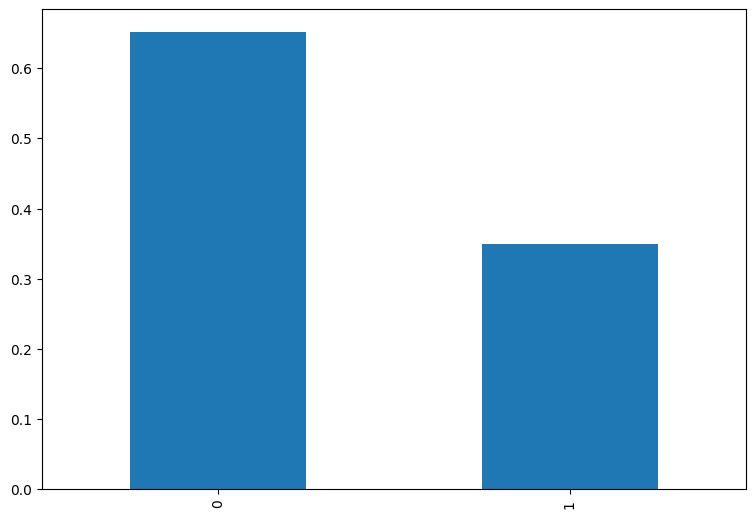

In [6]:
# percentage through bar chart
data['Outcome'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [7]:
data
#checking the relationship between the variables by applying the correlation
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

<Axes: >

In [8]:

# Split the dataset into features and target variable
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict probabilities of diabetes for the test set
y_pred_proba = model.predict_proba(X_test_scaled)

# Classify individuals into low and high-risk groups based on a threshold
risk_threshold = 0.5
risk_stratification = np.where(y_pred_proba[:, 1] >= risk_threshold, "High Risk", "Low Risk")
y_test_predict = np.where(y_pred_proba[:, 1] >= risk_threshold, 1, 0)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# risk_stratification_numeric = label_encoder.transform(risk_stratification)

print(f"Risk Stratification : {risk_stratification}")
print("=================================================")

Risk Stratification : ['Low Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk'
 'Low Risk' 'High Risk' 'High Risk' 'High Risk' 'Low Risk' 'High Risk'
 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk'
 'High Risk' 'High Risk' 'Low Risk' 'Low Risk' 'High Risk' 'Low Risk'
 'High Risk' 'High Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk'
 'High Risk' 'High Risk' 'High Risk' 'High Risk' 'High Risk' 'High Risk'
 'High Risk' 'Low Risk' 'High Risk' 'High Risk' 'Low Risk' 'High Risk'
 'High Risk' 'Low Risk' 'Low Risk' 'High Risk' 'High Risk' 'Low Risk'
 'Low Risk' 'High Risk' 'Low Risk' 'High Risk' 'High Risk' 'Low Risk'
 'Low Risk' 'Low Risk' 'High Risk' 'Low Risk' 'Low Risk' 'High Risk'
 'High Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'Low Risk' 'High Risk'
 'Low Risk' 'High Risk' 'Low Risk' 'High Risk' 'High Risk' 'Low Risk'
 'Low Risk' 'Low Risk' 'Low Risk' 'High Risk' 'Low Risk' 'Low Risk'
 'Low Risk' 'Low Risk' 'High Risk' 'Low Risk' 'Low Risk' 'Low Risk'
 'Low 

In [9]:
Report = classification_report(y_test, y_test_predict)
print(f"Classification Report: {classification_report(y_test, y_test_predict)}")

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



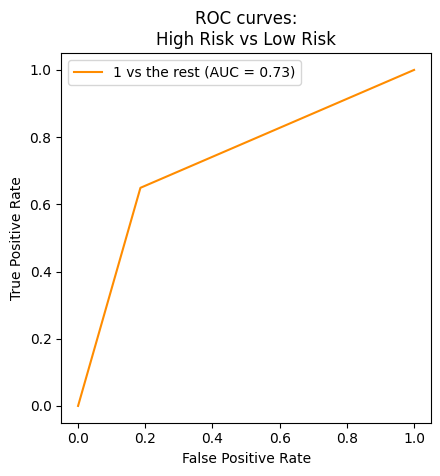

In [15]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_test_predict,
    y_test,
    name=f"{1} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves:\nHigh Risk vs Low Risk")
plt.legend()
plt.show()